# **Pengenalan Clustering dan K-Means**

# **Apa Itu Clustering...?**

Clustering adalah salah satu metode dalam unsupervised learning yang bertujuan untuk mengelompokkan sekumpulan data berdasarkan kemiripan karakteristik antar data. Dalam clustering, tidak ada label atau target output yang digunakan — proses ini bersifat eksploratif, membantu kita memahami struktur atau pola tersembunyi dalam data.

Tujuan Clustering
Menemukan pola tersembunyi di data.

Mengelompokkan data berdasarkan kemiripan.

Membantu dalam pengambilan keputusan atau pemodelan lebih lanjut.

Clustering sangat bermanfaat dalam tahap eksplorasi data karena dapat memberikan gambaran tentang berapa banyak kelompok alami yang ada dalam dataset. Idealnya, data dalam satu klaster memiliki variansi internal yang kecil (homogen), sementara variansi antar klaster harus besar (heterogen).



# **Algoritma K-Means**

K-Means adalah algoritma clustering berbasis centroid yang bekerja dengan cara mempartisi data ke dalam sejumlah klaster yang telah ditentukan sebelumnya (disebut k). Setiap klaster direpresentasikan oleh satu titik pusat yang disebut centroid. Tujuan dari algoritma ini adalah untuk meminimalkan jarak rata-rata antar data dengan centroid klasternya masing-masing.

Cara Kerja K-Means
Berikut adalah langkah-langkah dari algoritma K-Means:

1. Menentukan jumlah klaster k: Langkah awal adalah menetapkan berapa banyak kelompok (klaster) yang ingin dibentuk dari data.

2. Inisialisasi centroid: Sebanyak k centroid awal dipilih secara acak dari data.

3. Pengelompokan data:

- Hitung jarak antara setiap data ke semua centroid menggunakan metrik seperti Euclidean Distance.

- Setiap data akan dimasukkan ke klaster dengan centroid terdekat.

4. Perbarui posisi centroid:

- Hitung rata-rata dari semua data dalam tiap klaster, dan tetapkan hasilnya sebagai centroid baru.

5. Iterasi:

- Ulangi proses pengelompokan dan pembaruan centroid hingga data tidak berpindah klaster lagi atau centroid tidak berubah (konvergen).

Catatan Penting :
- K-Means sensitif terhadap outlier. Kehadiran data ekstrem bisa sangat mempengaruhi posisi centroid.

- K-Means bekerja optimal jika data memiliki bentuk klaster bulat/simetris dan berukuran seragam.

# **Evaluasi Kualitas Clustering**

1. Sum of Squared Error (SSE)
SSE mengukur jumlah kuadrat jarak antara data dengan centroid klasternya. Nilai SSE yang kecil menandakan bahwa data dalam klaster saling berdekatan (kompak).


$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$


  Keterangan:

  𝐶
  𝑖
  C
  i
  ​
  : Klaster ke-i

  𝜇
  𝑖
  μ
  i
  ​
  : Centroid dari klaster ke-i

  ∣
  ∣
  𝑥
  −
  𝜇
  𝑖
  ∣
  ∣
  2
  ∣∣x−μ
  i
  ​
  ∣∣
  2
  : Jarak Euclidean kuadrat antara data
  𝑥
  x dengan centroid
  𝜇
  𝑖
  μ
  i
  ​



2. Silhouette Score
Silhouette Score menunjukkan seberapa baik suatu data cocok dalam klasternya. Nilainya berkisar antara -1 hingga 1.


$$
S = \frac{b - a}{\max(a, b)}
$$
Keterangan:

𝑎
a: Rata-rata jarak antara data dan seluruh anggota klasternya (intra-cluster distance)

𝑏
b: Rata-rata jarak antara data dan anggota klaster terdekat lainnya (nearest-cluster distance)

𝑆
S: Nilai silhouette

Interpretasi nilai:

𝑆
≈
1
S≈1: Data sangat cocok dengan klasternya

𝑆
≈
0
S≈0: Data berada di antara dua klaster

𝑆
<
0
S<0: Data mungkin salah klaster

Kesimpulan :
- Evaluasi menggunakan SSE dan Silhouette Score penting untuk menilai kualitas klastering.

- Untuk menentukan jumlah klaster yang optimal, gunakan:

- Metode Elbow → analisis grafik SSE

- Analisis Silhouette → cari nilai rata-rata silhouette tertinggi

# **Implementasi Algoritma K-Means Menggunakan Python**

### **1. Install Library yang dibutuhkan**

Tujuan dari kode ini adalah untuk menginstal berbagai library yang diperlukan untuk menghubungkan Python dengan database, melakukan manipulasi data, serta membangun dan menerapkan modelnya.

In [4]:
#Install Library yang dibutuhkan

!pip install pymysql
!pip install psycopg2-binary
!pip install pandas
!pip install SQLAlchemy pymysql
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.6 MB/s eta 0:00:00


### **2. Mengambil Database dari DBever**

Kode ini bertujuan untuk menghubungkan Python ke database MySQL menggunakan library `pymysql`, mengambil data dari tabel `irissql` di database tersebut, mengubah data yang diambil menjadi format DataFrame menggunakan `pandas`, kemudian menampilkan data dalam bentuk tabel yang rapi, serta memastikan koneksi ke database ditutup dengan benar setelah proses selesai atau jika terjadi error.


In [5]:
#Langkah Selanjutnya adalah mengambil Database dari dbever

import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+-----------------+----------------+-----------------+
|     |   id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | species         |
|-----+------+-----------------+----------------+-----------------+----------------+-----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |      

### **3. Menghilangkan species / labelnya**

Kode ini bertujuan untuk mengambil data dari database MySQL, namun hanya kolom fitur (seperti `sepalLengthCm`, `sepalWidthCm`, `petalLengthCm`, dan `petalWidthCm`) tanpa kolom label atau kelas (`species`). Prosesnya dimulai dengan membuat koneksi ke database menggunakan `pymysql`, kemudian menjalankan query untuk mengambil data hanya dari kolom-kolom fitur tersebut. Data yang diambil lalu diubah menjadi format DataFrame dengan `pandas`, dan dikonversi menjadi array NumPy untuk keperluan analisis selanjutnya, seperti clustering. Terakhir, data tanpa kolom label ini ditampilkan dalam bentuk tabel yang rapi menggunakan `tabulate`, dan koneksi ke database ditutup dengan benar setelah proses selesai atau jika terjadi error.


In [6]:
#Selanjutnya Hilangkan species/labelnya

import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query untuk mengambil data tanpa kolom 'species'
    cur.execute("SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    data_remove_class = df.to_numpy()  # atau df.values

    # Menampilkan DataFrame tanpa kolom species (kalau ada)
    print("Data tanpa kolom 'species':")
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

Data tanpa kolom 'species':
+-----+-----------------+----------------+-----------------+----------------+
|     |   sepalLengthCm |   sepalWidthCm |   petalLengthCm |   petalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   0 |             5.1 |            3.5 |             1.4 |            0.2 |
|   1 |             4.9 |            3   |             1.4 |            0.2 |
|   2 |             4.7 |            3.2 |             1.3 |            0.2 |
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
|   4 |             5   |            3.6 |             1.4 |            0.2 |
|   5 |             5.4 |            3.9 |             1.7 |            0.4 |
|   6 |             4.6 |            3.4 |             1.4 |            0.3 |
|   7 |             5   |            3.4 |             1.5 |            0.2 |
|   8 |             4.4 |            2.9 |             1.4 |            0.2 |
|   9 |             4.9 |           

### **4. Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2**

Kode di atas bertujuan untuk melakukan pengelompokan (clustering) pada dataset iris menggunakan algoritma KMeans. Pertama, data fitur dari iris diambil dan kemudian dinormalisasi agar semua nilai fitur berada dalam rentang yang sama, sehingga proses clustering menjadi lebih efektif dan adil antar fitur. Selanjutnya, algoritma KMeans dijalankan untuk membagi data menjadi sejumlah cluster yang telah ditentukan (dalam contoh ini, 2 cluster). Setelah clustering selesai, kode ini mengevaluasi kualitas hasil cluster menggunakan metrik seperti inertia dan silhouette score, yang mengukur seberapa baik data terkelompok secara internal. Kemudian, untuk mengetahui seberapa sesuai hasil clustering dengan label kelas asli, setiap cluster dipetakan ke kelas mayoritas yang paling sering muncul di cluster tersebut, sehingga bisa dilakukan perbandingan dan perhitungan akurasi terhadap label asli. Terakhir, hasil pengelompokan, evaluasi, dan pemetaan kelas disimpan dan ditampilkan agar pengguna dapat melihat distribusi cluster per kelas serta performa clustering secara keseluruhan. Pendekatan ini membantu memahami apakah metode clustering mampu mengelompokkan data dengan pola yang mirip dengan klasifikasi asli yang sudah ada.

In [18]:
from google.colab import files
uploaded = files.upload()

Saving data_iris.xlsx to data_iris (6).xlsx


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd

# Memuat data dari file Excel yang berisi fitur dan label kelas
df = pd.read_excel("data_iris.xlsx")

# Memilih kolom fitur yang akan digunakan untuk clustering
features = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
# Mengambil kolom label asli untuk evaluasi nanti
labels = df['Class']

# Melakukan skala fitur agar nilainya berada di rentang 0 sampai 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Menjalankan algoritma KMeans untuk membagi data menjadi K cluster
K = 2  # Menentukan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=K, max_iter=300, tol=0.0001, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

# Menambahkan kolom cluster hasil prediksi ke dataframe asli
df['cluster'] = kmeans.labels_

# Menampilkan jumlah iterasi yang diperlukan hingga algoritma berhenti
print(f"Jumlah iterasi sampai konvergen: {kmeans.n_iter_}")
# Menampilkan nilai inertia sebagai ukuran kualitas cluster (semakin kecil semakin baik)
print(f"Inertia (SSE): {kmeans.inertia_:.4f}")
# Menghitung dan menampilkan skor silhouette untuk menilai seberapa baik cluster terbentuk
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

# Mengasosiasikan setiap cluster dengan kelas mayoritas dari data asli untuk penilaian akurasi
mapping = (
    df.groupby('cluster')['Class']
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Membandingkan label asli dengan hasil prediksi berdasarkan cluster untuk menghitung akurasi
y_true = labels
y_pred = df['predicted_class']

acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi keseluruhan clustering terhadap label asli: {acc:.4%}")

# Menampilkan tabel frekuensi untuk melihat distribusi cluster di tiap kelas asli
dist = pd.crosstab(df['Class'], df['cluster'], rownames=['Class'], colnames=['Cluster'])
print("\nDistribusi cluster per kelas:")
print(dist)

# Menyimpan hasil data yang sudah termasuk cluster dan prediksi kelas ke file Excel baru
df.to_excel("hasilnya.xlsx", index=False)

# Menampilkan tabel lengkap yang memuat label asli, hasil cluster, dan kelas prediksi
pd.set_option('display.max_rows', None)
print(df[['Class', 'cluster', 'predicted_class']])

Jumlah iterasi sampai konvergen: 4
Inertia (SSE): 12.1437
Silhouette Score: 0.6295

Akurasi keseluruhan clustering terhadap label asli: 66.6667%

Distribusi cluster per kelas:
Cluster           0   1
Class                  
Iris-setosa       0  50
Iris-versicolor  50   0
Iris-virginica   50   0
               Class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1      Iris-setosa
10       Iris-setosa        1      Iris-setosa
11       Iris-setosa        1      Iris-setosa
12       Iris-setosa        1      Iris-setosa
13       Iris-setosa        1      Iris-setosa

### **5. Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 3**

Kode ini bertujuan untuk mengelompokkan data iris menggunakan algoritma K-Means dan mengevaluasi hasilnya terhadap label kelas yang sebenarnya. Data fitur dinormalisasi terlebih dahulu, kemudian dilakukan *clustering* dengan 3 klaster sesuai jumlah kelas. Setelah itu, setiap klaster dipetakan ke kelas berdasarkan mayoritas anggotanya. Evaluasi dilakukan dengan menghitung akurasi, kesalahan per kelas, *Silhouette Score*, dan distribusi klaster. Hasil akhir disimpan dalam file Excel dan ditampilkan perbandingan antara kelas asli, klaster, dan kelas hasil prediksi.

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import pandas as pd

# Membaca file Excel yang mencakup data fitur serta label kelas
df = pd.read_excel("data_iris.xlsx")

# Membersihkan dan menyesuaikan format nama kolom agar seragam
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Menentukan kolom-kolom numerik yang akan digunakan dalam proses klasterisasi
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Mengubah nilai fitur ke dalam skala 0-1 untuk menghindari dominasi oleh fitur tertentu
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Inisialisasi dan pelatihan model KMeans dengan 3 klaster
K = 3
kmeans = KMeans(
    n_clusters=K,
    max_iter=300,
    tol=0.0001,
    random_state=42,
    n_init='auto'  # Ganti ke 10 jika menggunakan versi scikit-learn < 1.4
)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_  # Menyimpan hasil klasterisasi ke dalam dataframe

# Menampilkan informasi dasar tentang hasil proses KMeans
print(f"Jumlah iterasi hingga model berhenti: {kmeans.n_iter_}")
print(f"Nilai inertia (total SSE): {kmeans.inertia_:.4f}")
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Skor Silhouette: {sil_score:.4f}")

# Mengaitkan setiap cluster dengan label kelas yang paling sering muncul dalam cluster tersebut
mapping = (
    df.groupby('cluster')['class']
      .agg(lambda x: x.mode()[0])
      .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Menyiapkan data asli dan hasil prediksi untuk keperluan evaluasi
y_true   = df['class']
y_pred   = df['predicted_class']
classes  = sorted(df['class'].unique())
cm       = confusion_matrix(y_true, y_pred, labels=classes)

# Mengukur akurasi umum dari hasil clustering terhadap label asli
acc = accuracy_score(y_true, y_pred)
print(f"\nTingkat akurasi secara keseluruhan: {acc:.4%}")

# Menghitung tingkat kesalahan pada masing-masing kelas
error_per_class = {}
for i, c in enumerate(classes):
    total   = cm[i].sum()
    correct = cm[i, i]
    error   = 1 - correct/total if total > 0 else 0
    error_per_class[c] = error

print("\nRasio kesalahan berdasarkan kelas:")
for c, e in error_per_class.items():
    print(f" - {c}: {e:.2%}")

# Menyusun tabulasi frekuensi hubungan antara label asli dengan klaster hasil
dist = pd.crosstab(df['class'], df['cluster'],
                   rownames=['Class'], colnames=['Cluster'])
print("\nTabel distribusi cluster untuk setiap kelas:")
print(dist)

# Menyimpan hasil analisis lengkap ke file Excel
df.to_excel("hasil_clustering_dengan_class_lengkap.xlsx", index=False)

# Menampilkan perbandingan antara label asli, hasil klasterisasi, dan prediksi kelas
pd.set_option('display.max_rows', None)
print("\nTabel perbandingan class, cluster, dan predicted_class:")
print(df[['class', 'cluster', 'predicted_class']])


Jumlah iterasi hingga model berhenti: 3
Nilai inertia (total SSE): 7.1386
Skor Silhouette: 0.4825

Tingkat akurasi secara keseluruhan: 88.0000%

Rasio kesalahan berdasarkan kelas:
 - Iris-setosa: 0.00%
 - Iris-versicolor: 20.00%
 - Iris-virginica: 16.00%

Tabel distribusi cluster untuk setiap kelas:
Cluster           0   1   2
Class                      
Iris-setosa       0  50   0
Iris-versicolor  10   0  40
Iris-virginica   42   0   8

Tabel perbandingan class, cluster, dan predicted_class:
               class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1   

### **6. Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 4**

Kode di atas bertujuan untuk mengelompokkan data iris ke dalam empat kelompok (cluster) menggunakan algoritma KMeans. Proses dimulai dengan membaca data fitur iris dari file Excel, kemudian data tersebut dinormalisasi agar setiap fitur memiliki skala yang sama sehingga hasil clustering menjadi lebih akurat. Setelah itu, model KMeans dijalankan dengan jumlah cluster sebanyak empat untuk menemukan pola pengelompokan dalam data tanpa menggunakan label asli. Selanjutnya, hasil cluster yang diperoleh dipetakan ke kelas asli berdasarkan dominasi kelas dalam masing-masing cluster, sehingga memungkinkan evaluasi akurasi clustering terhadap label sebenarnya. Kode ini juga menghitung dan menampilkan beberapa metrik penting seperti jumlah iterasi hingga konvergensi, inertia sebagai ukuran seberapa rapat cluster, serta silhouette score yang mengukur kualitas pemisahan cluster. Akhirnya, hasil clustering beserta prediksi kelas disimpan ke file Excel dan juga ditampilkan distribusi data dari tiap kelas asli dalam cluster yang terbentuk, sehingga dapat dianalisis lebih lanjut efektivitas metode clustering tersebut.


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd

# Membaca dataset iris dari file Excel
df = pd.read_excel("data_iris.xlsx")

# Memilih kolom fitur yang akan digunakan untuk proses clustering
features = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# Melakukan skala fitur agar berada dalam rentang 0 sampai 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Menginisialisasi model KMeans dengan jumlah cluster 4 sesuai permintaan
K = 4
kmeans = KMeans(n_clusters=K, max_iter=300, tol=0.0001, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

# Menyimpan label cluster hasil clustering ke dalam dataframe
df['cluster'] = kmeans.labels_

# Menampilkan jumlah iterasi yang dibutuhkan sampai model mencapai konvergensi
print(f"Jumlah iterasi hingga stabil: {kmeans.n_iter_}")
# Menampilkan nilai inertia, ukuran total jarak dalam cluster yang ingin diminimalkan
print(f"Inertia (jumlah kuadrat jarak dalam cluster): {kmeans.inertia_:.4f}")
# Menghitung skor silhouette yang mengukur seberapa baik cluster terbentuk
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Skor Silhouette: {sil_score:.4f}")

# Membuat pemetaan cluster ke kelas dominan berdasarkan label asli
mapping = (
    df.groupby('cluster')['Class']
    .agg(lambda x: x.mode()[0])  # Kelas paling sering muncul dalam cluster
    .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Membandingkan hasil prediksi cluster dengan label asli menggunakan akurasi
y_true = df['Class']
y_pred = df['predicted_class']

acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi hasil clustering terhadap label sebenarnya: {acc:.4%}")

# Menampilkan tabel distribusi jumlah data tiap kelas asli di setiap cluster
dist = pd.crosstab(df['Class'], df['cluster'], rownames=['Kelas'], colnames=['Cluster'])
print("\nDistribusi data tiap kelas pada cluster:")
print(dist)

# Menyimpan hasil clustering dan prediksi ke file Excel baru
df.to_excel("hasil_iris_kmeans_k4.xlsx", index=False)

# Menampilkan seluruh data dengan kolom kelas asli, cluster, dan prediksi
pd.set_option('display.max_rows', None)
print(df[['Class', 'cluster', 'predicted_class']])

Jumlah iterasi hingga stabil: 6
Inertia (jumlah kuadrat jarak dalam cluster): 5.5417
Skor Silhouette: 0.4435

Akurasi hasil clustering terhadap label sebenarnya: 84.6667%

Distribusi data tiap kelas pada cluster:
Cluster           0   1   2   3
Kelas                          
Iris-setosa       0  50   0   0
Iris-versicolor  21   0  29   0
Iris-virginica   21   0   2  27
               Class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1      Iris-setosa
10       Iris-setosa        1      Iris-setosa
11       Iris-setosa        1      Iris-setosa
12       Iris-se

### **7. Kesimpulan**

Pada analisis clustering menggunakan metode K-Means dengan variasi jumlah cluster (K), ditemukan hasil evaluasi yang berbeda-beda untuk masing-masing nilai K yang diuji, yaitu K = 2, K = 3, dan K = 4. Evaluasi dilakukan dengan menggunakan dua metrik utama, yaitu nilai inertia (sum of squared errors/SSE) dan silhouette score, yang masing-masing menggambarkan kualitas cluster dari sisi internal dan eksternal.

Untuk **K = 2**, nilai inertia sebesar 12.1437 menunjukkan bahwa rata-rata jarak titik data terhadap pusat cluster masih cukup besar, yang mengindikasikan cluster masih agak longgar. Namun, nilai silhouette score sebesar 0.6295 menunjukkan bahwa cluster yang terbentuk cukup baik, karena nilai ini cukup mendekati 1 yang merupakan nilai ideal. Silhouette score yang tinggi berarti bahwa tiap data lebih dekat dengan pusat cluster sendiri dibandingkan pusat cluster lain, sehingga cluster relatif terpisah dan memiliki struktur yang jelas. Hal ini mengindikasikan bahwa K = 2 menghasilkan pembagian cluster yang cukup natural dan representatif untuk data yang dianalisis.

Pada pengujian dengan **K = 3**, nilai inertia menurun menjadi 7.1386, yang berarti titik-titik data secara keseluruhan berada lebih dekat dengan pusat cluster masing-masing. Secara matematis, penurunan inertia mengindikasikan cluster menjadi lebih rapat. Namun, nilai silhouette score juga mengalami penurunan cukup signifikan menjadi 0.4825. Penurunan ini menunjukkan bahwa meskipun cluster menjadi lebih rapat, kualitas pemisahan antar cluster menurun, dengan beberapa titik data yang mulai berada pada batas antara cluster. Hal ini dapat mengindikasikan adanya tumpang tindih antar cluster, atau cluster yang kurang jelas batasnya.

Selanjutnya, pada **K = 4**, nilai inertia kembali turun menjadi 5.5417, yang menunjukkan cluster semakin kompak dan titik-titik data lebih dekat ke pusatnya masing-masing. Namun demikian, nilai silhouette score mengalami penurunan lebih jauh menjadi 0.4435, yang menunjukkan semakin memburuknya kualitas pemisahan cluster. Penurunan silhouette score ini dapat disebabkan oleh terlalu banyak cluster yang memecah data secara berlebihan sehingga ada overlap antar cluster atau cluster yang tidak bermakna secara struktural.

Berdasarkan analisis kedua metrik tersebut, dapat disimpulkan bahwa meskipun nilai inertia cenderung menurun seiring bertambahnya jumlah cluster (yang memang diharapkan karena cluster lebih kecil dan rapat), nilai silhouette score yang menjadi indikator utama kualitas pemisahan cluster menunjukkan penurunan setelah K = 2. Oleh karena itu, **K = 2 merupakan jumlah cluster yang paling optimal** karena memberikan keseimbangan terbaik antara kepadatan cluster (internal cohesion) dan keterpisahan antar cluster (separation). Nilai silhouette score yang paling tinggi pada K = 2 memperkuat keputusan ini, menandakan cluster yang dihasilkan lebih jelas, terpisah, dan bermakna secara statistik dibandingkan dengan K lainnya.

Dengan demikian, untuk dataset yang digunakan, penggunaan dua cluster cukup untuk merepresentasikan pola utama dalam data secara efektif tanpa menimbulkan kompleksitas berlebih atau penurunan kualitas clustering.

### **8. Metode Elbow**

**Metode Elbow dalam Penentuan Jumlah Klaster Optimal**

Dalam analisis klaster, salah satu tantangan utama adalah menentukan jumlah klaster (𝑘) yang paling sesuai untuk memetakan data secara efektif. Jika jumlah klaster terlalu sedikit, pengelompokan akan terlalu kasar dan tidak mampu menangkap pola yang berbeda di dalam data. Sebaliknya, jika jumlah klaster terlalu banyak, model akan terlalu kompleks dan bisa menyebabkan overfitting, yaitu pengelompokan yang terlalu spesifik dan kurang generalisasi.

Metode Elbow adalah salah satu teknik populer yang digunakan untuk membantu menentukan nilai 𝑘 yang optimal. Prinsip utamanya adalah dengan memantau perubahan nilai *inertia* atau *Within-Cluster Sum of Squares* (WCSS) saat jumlah klaster bertambah. WCSS adalah ukuran seberapa baik data dalam setiap klaster terkelompok dengan menghitung total jarak kuadrat antara titik data dan pusat klasternya. Semakin kecil nilai WCSS, semakin rapat klaster tersebut.

Langkahnya sebagai berikut:

1. Jalankan algoritma klaster (misalnya K-Means) untuk beberapa nilai 𝑘 yang berbeda, misalnya dari 1 hingga 10.
2. Hitung WCSS untuk setiap 𝑘.
3. Plot grafik WCSS terhadap 𝑘.

Grafik ini biasanya menunjukkan penurunan WCSS yang tajam saat 𝑘 meningkat dari 1, karena klaster yang lebih banyak membuat data lebih tersegmentasi dan jarak dalam klaster mengecil. Namun, setelah mencapai suatu titik tertentu, penurunan WCSS mulai melambat dan grafik cenderung mendatar. Titik di mana perubahan penurunan ini berkurang drastis dan membentuk sudut yang menyerupai siku (elbow) disebut titik *elbow*.

Titik *elbow* ini penting karena menunjukkan nilai 𝑘 di mana penambahan klaster baru tidak lagi memberikan perbaikan signifikan dalam pengelompokan data. Dengan kata lain, klaster tersebut sudah cukup untuk mewakili struktur data secara efisien tanpa menambah kompleksitas yang tidak perlu.

Sebagai contoh dari hasil metode Elbow yang umum pada dataset Iris, nilai optimal 𝑘 sering kali berada pada 3. Pada titik ini, WCSS mengalami penurunan cukup besar dibandingkan nilai 𝑘 sebelumnya, menandakan klasterisasi yang efektif. Setelah 𝑘 = 3, penurunan WCSS semakin kecil sehingga menandakan pembagian data ke dalam lebih banyak klaster tidak memberikan manfaat signifikan.

Kesimpulannya, metode Elbow memudahkan pemilihan jumlah klaster optimal secara visual dan empiris dengan mempertimbangkan keseimbangan antara kompleksitas model dan kualitas pengelompokan.

Berikut Adalah Contoh Elbow Method :

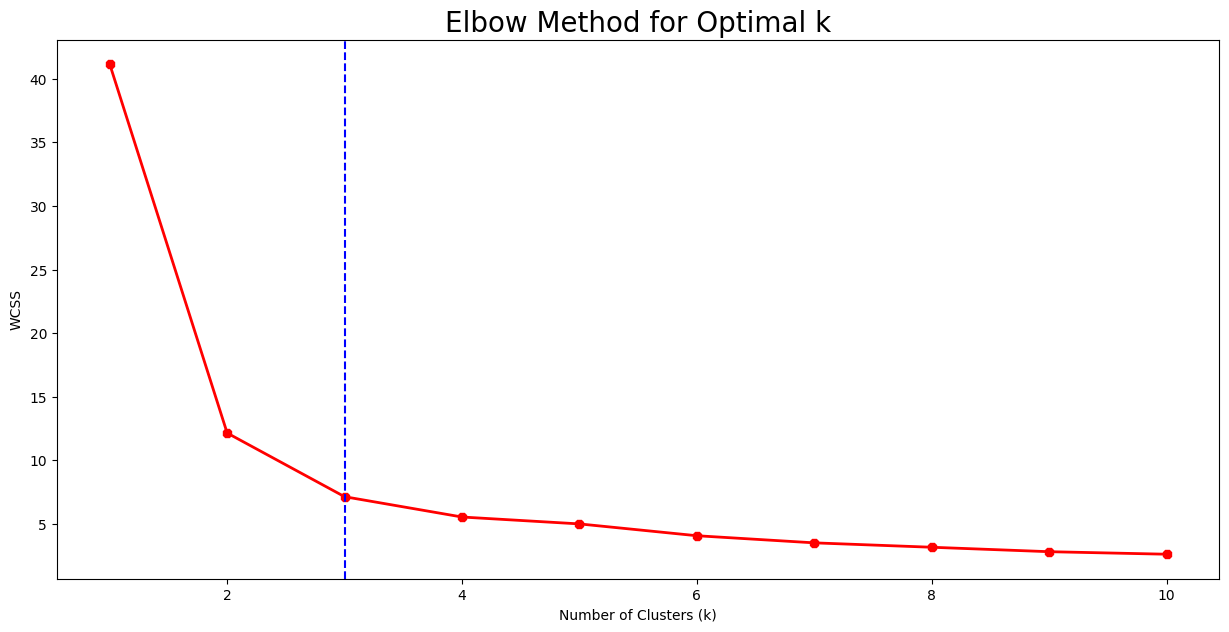

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load dataset
iris = pd.read_excel('data_iris.xlsx')

# Pilih kolom fitur: petal length, petal width, sepal length, sepal width
iris_x = iris[['petal length', 'petal width', 'sepal length', 'sepal width']]

# Konversi ke numpy array
x_iris = np.array(iris_x)

# Scaling fitur ke rentang 0-1
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_iris)

# Hitung WCSS untuk berbagai jumlah cluster (1 sampai 10)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x_scaled)   # gunakan data yang sudah di-scaling
    wcss.append(km.inertia_)

# Visualisasi Elbow Method
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.axvline(x=3, ls='--', color='blue')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters (k)')
plt.title('Elbow Method for Optimal k', fontsize=20)
plt.show()